In [18]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [19]:
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

In [20]:
print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [21]:
print(t_train[:10])

[9 0 0 3 0 2 7 2 5 5]


In [22]:
import matplotlib.pyplot as plt

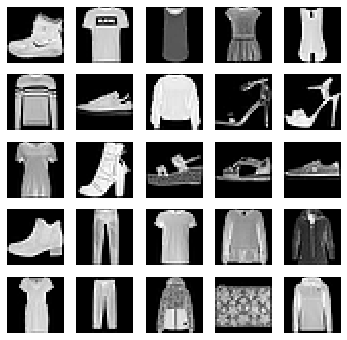

In [23]:
plt.figure(figsize=(6,6))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.axis('off')
plt.show()

In [24]:
# Normalization만 수행하고, One-Hot Encoding은 수행 X
x_train = (x_train - 0.0) / 255
x_test = (x_test - 0.0) / 255

# 모델 구축 , Layer add

In [25]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


# Model compile

In [29]:
# loss를 "sparse_categorical_crossentropy"로 한 이유는 One-Hot_Encoding하지 않고, 3,2,1,0,9와 같은
# 답안을 그대로 사용했기 때문 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


# model fit

In [31]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.6843 - accuracy: 0.7655 - val_loss: 0.4791 - val_accuracy: 0.8232
Epoch 2/30
1313/1313 [==============================] - 1s 909us/step - loss: 0.4087 - accuracy: 0.8531 - val_loss: 0.4257 - val_accuracy: 0.8456
Epoch 3/30
1313/1313 [==============================] - 1s 917us/step - loss: 0.3575 - accuracy: 0.8712 - val_loss: 0.3908 - val_accuracy: 0.8580
Epoch 4/30
1313/1313 [==============================] - 1s 913us/step - loss: 0.3273 - accuracy: 0.8821 - val_loss: 0.3479 - val_accuracy: 0.8735
Epoch 5/30
1313/1313 [==============================] - 1s 918us/step - loss: 0.3044 - accuracy: 0.8891 - val_loss: 0.3338 - val_accuracy: 0.8786
Epoch 6/30
1313/1313 [==============================] - 1s 917us/step - loss: 0.2937 - accuracy: 0.8933 - val_loss: 0.3416 - val_accuracy: 0.8765
Epoch 7/30
1313/1313 [==============================] - 1s 950us/step - loss: 0.2767 - accuracy: 0.8956 - val_loss: 0.3200 - v

In [32]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 585us/step - loss: 0.4163 - accuracy: 0.8837


[0.41628751158714294, 0.8837000131607056]

# 손실 및 정확도

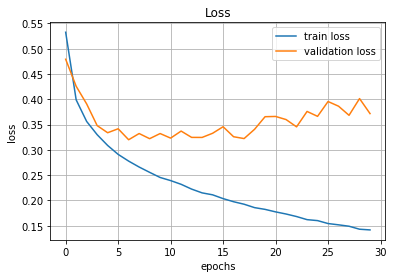

In [33]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()


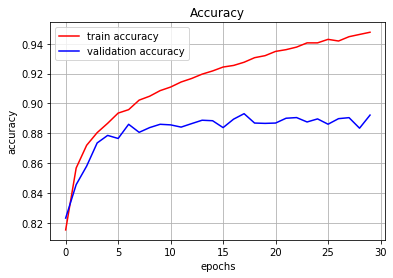

In [35]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy', color = 'red')
plt.plot(hist.history['val_accuracy'], label='validation accuracy', color = 'blue')

plt.legend(loc='best')
plt.show()



In [36]:
type(hist)

tensorflow.python.keras.callbacks.History

In [41]:
print(len(hist.history))


4


In [43]:
# loss, accuracy, val_loss, val_accuracy 총 4가지가 담겨있음 
hist.history

{'loss': [0.5325331687927246,
  0.3988678753376007,
  0.35611408948898315,
  0.32995420694351196,
  0.3086264729499817,
  0.29100680351257324,
  0.2776866853237152,
  0.26596733927726746,
  0.2554621994495392,
  0.24531033635139465,
  0.23915882408618927,
  0.23180443048477173,
  0.22232617437839508,
  0.2148589789867401,
  0.21101392805576324,
  0.2035217583179474,
  0.19736333191394806,
  0.19241398572921753,
  0.18567156791687012,
  0.18223407864570618,
  0.1772899478673935,
  0.173062264919281,
  0.16804879903793335,
  0.16191211342811584,
  0.1600223034620285,
  0.15421099960803986,
  0.15165723860263824,
  0.148899644613266,
  0.14299634099006653,
  0.14160872995853424],
 'accuracy': [0.8152381181716919,
  0.8566904664039612,
  0.8719523549079895,
  0.8804047703742981,
  0.8866666555404663,
  0.8934999704360962,
  0.895809531211853,
  0.9021904468536377,
  0.9048095345497131,
  0.9085476398468018,
  0.9109523892402649,
  0.9143333435058594,
  0.916690468788147,
  0.91959524154663

In [44]:
len(hist.history['loss'])

30

In [45]:
len(hist.history['accuracy'])

30

In [46]:
len(hist.history['val_accuracy'])

30

In [47]:
len(hist.history['val_loss'])

30

In [48]:
#왜 위의 값들이 모두 30개냐? ==> epoch가 30개였으니!!

# Confusion matrix로 예측 현황 살펴보기

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

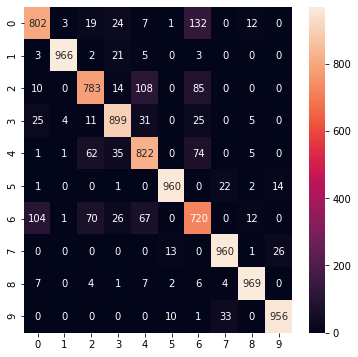

In [51]:
plt.figure(figsize=(6,6))

# model.predict는 One-Hot Encoding 형태로 return해주므로, argmax로 변환해줘야함.
predicted_value = model.predict(x_test)

cm = confusion_matrix(t_test, np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [52]:
print(cm)

[[802   3  19  24   7   1 132   0  12   0]
 [  3 966   2  21   5   0   3   0   0   0]
 [ 10   0 783  14 108   0  85   0   0   0]
 [ 25   4  11 899  31   0  25   0   5   0]
 [  1   1  62  35 822   0  74   0   5   0]
 [  1   0   0   1   0 960   0  22   2  14]
 [104   1  70  26  67   0 720   0  12   0]
 [  0   0   0   0   0  13   0 960   1  26]
 [  7   0   4   1   7   2   6   4 969   0]
 [  0   0   0   0   0  10   1  33   0 956]]


In [54]:
model.evaluate(x_test, t_test)


313/313 [==============================] - 0s 528us/step - loss: 0.4163 - accuracy: 0.8837


[0.41628751158714294, 0.8837000131607056]

## 88% 의 정확도